<a href="https://colab.research.google.com/github/AlanCarro/PROYECTO_FINAL-Alan_Emanuel_Carro/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENTREGA FINAL**

## **METADATA**

## **IMPORTACIÓN DE DATASET**

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

from datetime import datetime
from numpy import nan
from numpy import isnan

APPLE = yf.download('AAPL')
GOOGLE = yf.download('GOOGL')
MICROSOFT = yf.download('MSFT')
AMAZON = yf.download('AMZN')
NVIDIA = yf.download('NVDA')
AMD = yf.download('AMD')
INTEL = yf.download('INTC')

In [ ]:
df= pd.concat([APPLE, GOOGLE, MICROSOFT, AMAZON, NVIDIA, AMD, INTEL], axis=1)
eliminar_columnas = ['Adj Close']
df = df.drop(eliminar_columnas, axis=1)
df.fillna(0, inplace=True)

empresas = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']
if 'Open APPLE' not in df.columns:
  nuevas_columnas = []
  for i in range(len(df.columns)):
    empresa = empresas[i // 5]
    columna = df.columns[i]
    nuevas_columnas.append(f'{columna} {empresa}')

df.columns = nuevas_columnas
df.columns

Index(['Open APPLE', 'High APPLE', 'Low APPLE', 'Close APPLE', 'Volume APPLE',
       'Open GOOGLE', 'High GOOGLE', 'Low GOOGLE', 'Close GOOGLE',
       'Volume GOOGLE', 'Open MICROSOFT', 'High MICROSOFT', 'Low MICROSOFT',
       'Close MICROSOFT', 'Volume MICROSOFT', 'Open AMAZON', 'High AMAZON',
       'Low AMAZON', 'Close AMAZON', 'Volume AMAZON', 'Open NVIDIA',
       'High NVIDIA', 'Low NVIDIA', 'Close NVIDIA', 'Volume NVIDIA',
       'Open AMD', 'High AMD', 'Low AMD', 'Close AMD', 'Volume AMD',
       'Open INTEL', 'High INTEL', 'Low INTEL', 'Close INTEL', 'Volume INTEL'],
      dtype='object')

In [ ]:
for accion in empresas:
    columna_apertura = 'Open ' + accion
    columna_cierre = 'Close ' + accion
    columna_resta = (df[columna_apertura] - df[columna_cierre]) / df[columna_apertura]
    insert_position = (empresas.index(accion) + 1) * 5
    df.insert(insert_position,'Varianza ' + accion, columna_resta)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11188 entries, 1980-03-17 to 2024-08-01
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open APPLE          11188 non-null  float64
 1   High APPLE          11188 non-null  float64
 2   Low APPLE           11188 non-null  float64
 3   Close APPLE         11188 non-null  float64
 4   Volume APPLE        11188 non-null  float64
 5   Varianza APPLE      11000 non-null  float64
 6   Open GOOGLE         11188 non-null  float64
 7   High GOOGLE         11188 non-null  float64
 8   Low GOOGLE          11188 non-null  float64
 9   Close GOOGLE        11188 non-null  float64
 10  Varianza GOOGLE     5022 non-null   float64
 11  Volume GOOGLE       11188 non-null  float64
 12  Open MICROSOFT      11188 non-null  float64
 13  High MICROSOFT      11188 non-null  float64
 14  Low MICROSOFT       11188 non-null  float64
 15  Varianza MICROSOFT  9674 non-null   

In [ ]:
columnas_seleccionadas = df.loc['2024-06-07', ['Open APPLE', 'Open GOOGLE', 'Open MICROSOFT', 'Open AMAZON', 'Open NVIDIA', 'Open AMD', 'Open INTEL']]
columnas_seleccionadas

,2024-06-07 00:00:00
Open APPLE,194.649994
Open GOOGLE,177.050003
Open MICROSOFT,426.200012
Open AMAZON,184.899994
Open NVIDIA,119.769997
Open AMD,166.589996
Open INTEL,30.250000


 ## **ANALISIS EXPLORATORIO DE DATOS**

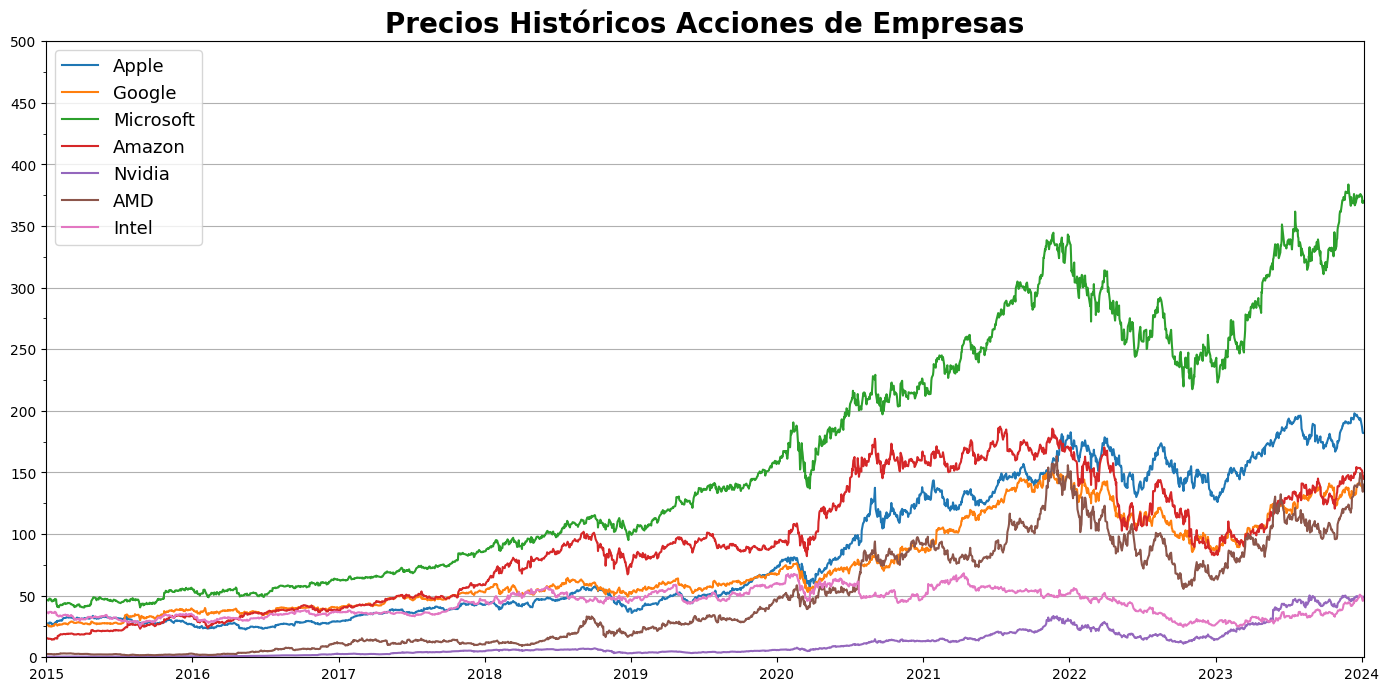

In [ ]:
fig, ax = plt.subplots(figsize = (17, 8))


ax.set_title('Precios Históricos Acciones de Empresas', fontsize=20, weight='bold')
ax.plot(df.index, df['Open APPLE'], label= 'Apple')
ax.plot(df.index, df['Open GOOGLE'], label= 'Google')
ax.plot(df.index, df['Open MICROSOFT'], label= 'Microsoft')
ax.plot(df.index, df['Open AMAZON'], label= 'Amazon')
ax.plot(df.index, df['Open NVIDIA'], label= 'Nvidia')
ax.plot(df.index, df['Open AMD'], label= 'AMD')
ax.plot(df.index, df['Open INTEL'], label= 'Intel')
ax.legend(loc='upper left', fontsize=13)
ax.set_xlim(pd.to_datetime('1/1/2015'), pd.to_datetime('1/6/2024'))
plt.ylim(bottom=0, top=500)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(25))

ax.grid(axis='y')

Text(0, 0.5, 'INTEL')

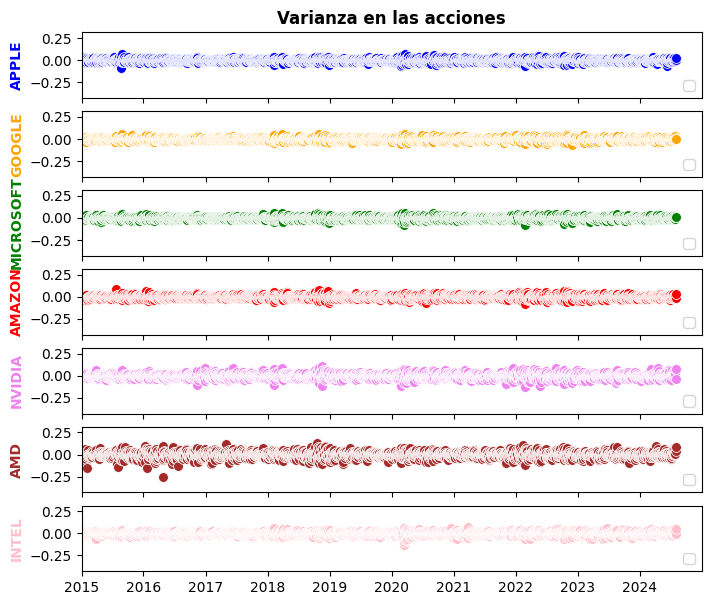

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 7), sharex=True, sharey=True)

sns.scatterplot(data=df, x= df.index, y=df['Varianza APPLE'],ax=ax[0], color='blue', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza GOOGLE'],ax=ax[1], color='orange', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza MICROSOFT'],ax=ax[2], color='green', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza AMAZON'],ax=ax[3], color='red', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza NVIDIA'],ax=ax[4], color='violet', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza AMD'],ax=ax[5], color='brown', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza INTEL'],ax=ax[6], color='pink', s=50)

for a in ax:
    a.set_xlim(pd.to_datetime('01/01/2015'), pd.to_datetime('12/31/2024'))
    a.legend(loc='lower right', fontsize=10)
    a.set_ylabel('')
    a.set_xlabel('')

ax[0].set_title('Varianza en las acciones', weight='bold')
ax[3].set_xlabel('Año')
ax[0].set_ylabel('APPLE',color='blue',weight='bold')
ax[1].set_ylabel('GOOGLE',color='orange',weight='bold')
ax[2].set_ylabel('MICROSOFT',color='green',weight='bold')
ax[3].set_ylabel('AMAZON',color='red',weight='bold')
ax[4].set_ylabel('NVIDIA',color='violet',weight='bold')
ax[5].set_ylabel('AMD',color='brown',weight='bold')
ax[6].set_ylabel('INTEL',color='pink',weight='bold')

Text(0.5, 1.0, 'Volumen diario Acciones')

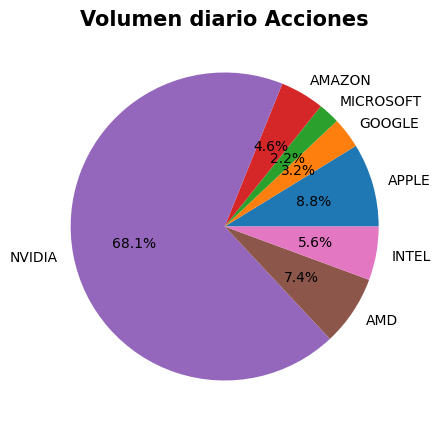

In [ ]:
columnas_seleccionadas = df.loc['2024-06-07', ['Volume APPLE', 'Volume GOOGLE', 'Volume MICROSOFT', 'Volume AMAZON', 'Volume NVIDIA', 'Volume AMD', 'Volume INTEL']]

fig,ax = plt.subplots(figsize =(5, 5))

vol_indices = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']
ax.pie(columnas_seleccionadas, labels = vol_indices,autopct='%1.1f%%')

plt.title('Volumen diario Acciones', fontsize=15, weight='bold', loc = 'center')

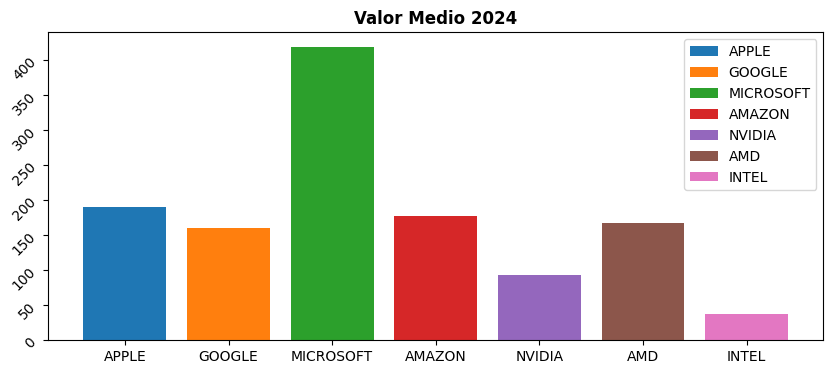

In [ ]:
plt.figure(figsize=(10, 4))
df_rango = df.loc['2024-01-01':'2024-12-31']

media1 = df_rango['Open APPLE'].mean()
media2 = df_rango['Open GOOGLE'].mean()
media3 = df_rango['Open MICROSOFT'].mean()
media4 = df_rango['Open AMAZON'].mean()
media5 = df_rango['Open NVIDIA'].mean()
media6 = df_rango['Open AMD'].mean()
media7 = df_rango['Open INTEL'].mean()

medias = [media1 ,media2 ,media3 ,media4 ,media5 ,media6 ,media7]
column = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']

for i in range(len(column)):
    plt.bar(column[i],
            medias[i],
            label=column[i])

plt.title('Valor Medio 2024',weight='bold')

plt.yticks(rotation=45)
plt.legend()

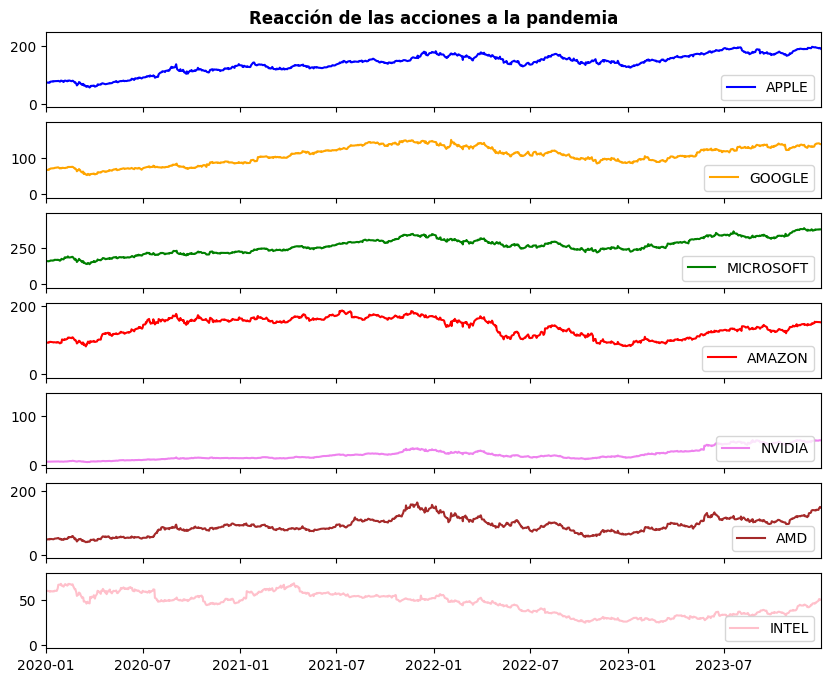

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10, 8), sharex=True)

sns.lineplot(x=df.index, y=df['Open APPLE'], color='blue',label='APPLE', ax=ax[0])
sns.lineplot(x=df.index, y=df['Open GOOGLE'], color='orange',label='GOOGLE', ax=ax[1])
sns.lineplot(x=df.index, y=df['Open MICROSOFT'], color='green',label='MICROSOFT', ax=ax[2])
sns.lineplot(x=df.index, y=df['Open AMAZON'], color='red',label='AMAZON', ax=ax[3])
sns.lineplot(x=df.index, y=df['Open NVIDIA'], color='violet',label='NVIDIA', ax=ax[4])
sns.lineplot(x=df.index, y=df['Open AMD'], color='brown',label='AMD', ax=ax[5])
sns.lineplot(x=df.index, y=df['Open INTEL'], color='pink',label='INTEL', ax=ax[6])

ax[0].set_title('Reacción de las acciones a la pandemia',weight='bold')

for a in ax:
    a.set_xlim(pd.to_datetime('01/01/2020'), pd.to_datetime('12/31/2023'))
    a.legend(loc='lower right', fontsize=10)
    a.set_ylabel('')
    a.set_xlabel('')

## **REGRESIÓN**


In [ ]:
from   scipy import stats
import statsmodels.formula.api as sm
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
pd.options.mode.chained_assignment = None
df_limitado = df.head(10000)
df_limitado['media_precios'] = df_limitado[['Open APPLE', 'Open GOOGLE', 'Open MICROSOFT', 'Open AMAZON', 'Open NVIDIA', 'Open AMD', 'Open INTEL']].mean(axis=1)

df_final = df_limitado.drop(['Open APPLE', 'High APPLE', 'Low APPLE', 'Close APPLE', 'Volume APPLE',
       'Open GOOGLE', 'High GOOGLE', 'Low GOOGLE', 'Close GOOGLE',
       'Volume GOOGLE', 'Open MICROSOFT', 'High MICROSOFT', 'Low MICROSOFT',
       'Close MICROSOFT', 'Volume MICROSOFT', 'Open AMAZON', 'High AMAZON',
       'Low AMAZON', 'Close AMAZON', 'Volume AMAZON', 'Open NVIDIA',
       'High NVIDIA', 'Low NVIDIA', 'Close NVIDIA', 'Volume NVIDIA',
       'Open AMD', 'High AMD', 'Low AMD', 'Close AMD', 'Volume AMD',
       'Open INTEL', 'High INTEL', 'Low INTEL', 'Close INTEL', 'Volume INTEL'], axis=1)

semanas = ((df.index - pd.Timestamp('1960-12-21')) / np.timedelta64(1, 'W')).values.reshape(-1, 1)
semanas = semanas[:10000]

In [ ]:
x = semanas
y = df_limitado['media_precios']

x, X_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
modelo = LinearRegression()

modelo.fit(x, y)

prediccion_precios_gral = modelo.predict(x)

In [ ]:
df_limitado.corr()

,Open APPLE,High APPLE,Low APPLE,Close APPLE,Volume APPLE,Varianza APPLE,Open GOOGLE,High GOOGLE,Low GOOGLE,Close GOOGLE,...,Low AMD,Close AMD,Varianza INTEL,Volume AMD,Open INTEL,High INTEL,Low INTEL,Close INTEL,Volume INTEL,media_precios
Open APPLE,1.000000,0.999958,0.999944,0.999903,-0.110592,-0.005658,0.975504,0.975447,0.975612,0.975497,...,0.069061,0.068231,-0.010315,0.729206,0.643418,0.638532,0.648439,0.644087,-0.276357,0.925329
High APPLE,0.999958,1.000000,0.999931,0.999951,-0.109576,-0.007891,0.975536,0.975516,0.975654,0.975569,...,0.069256,0.068458,-0.011227,0.729766,0.643609,0.638758,0.648638,0.644316,-0.276060,0.925497
Low APPLE,0.999944,0.999931,1.000000,0.999954,-0.112359,-0.008166,0.975517,0.975472,0.975691,0.975574,...,0.069287,0.068455,-0.011489,0.728367,0.643235,0.638357,0.648303,0.643958,-0.277069,0.925303
Close APPLE,0.999903,0.999951,0.999954,1.000000,-0.110986,-0.010296,0.975511,0.975498,0.975683,0.975614,...,0.069327,0.068547,-0.012688,0.728892,0.643413,0.638569,0.648484,0.644189,-0.276625,0.925382
Volume APPLE,-0.110592,-0.109576,-0.112359,-0.110986,1.000000,-0.010001,-0.040257,-0.039338,-0.041720,-0.040703,...,0.137142,0.138360,0.011854,0.083601,0.189567,0.190884,0.187258,0.188631,0.299614,0.007748
Varianza APPLE,-0.005658,-0.007891,-0.008166,-0.010296,-0.010001,1.000000,-0.007152,-0.008198,-0.008582,-0.009738,...,0.016138,0.008206,0.454880,0.003963,-0.015075,-0.019770,-0.020112,-0.025817,0.011171,-0.009926
Open GOOGLE,0.975504,0.975536,0.975517,0.975511,-0.040257,-0.007152,1.000000,0.999959,0.999941,0.999899,...,0.093196,0.091793,-0.009577,0.756721,0.654551,0.649427,0.659778,0.655214,-0.261198,0.932435
High GOOGLE,0.975447,0.975516,0.975472,0.975498,-0.039338,-0.008198,0.999959,1.000000,0.999933,0.999949,...,0.093316,0.091946,-0.010409,0.757081,0.654658,0.649566,0.659890,0.655357,-0.260765,0.932534
Low GOOGLE,0.975612,0.975654,0.975691,0.975683,-0.041720,-0.008582,0.999941,0.999933,1.000000,0.999959,...,0.093255,0.091862,-0.010771,0.755672,0.654472,0.649354,0.659749,0.655190,-0.261982,0.932379
Close GOOGLE,0.975497,0.975569,0.975574,0.975614,-0.040703,-0.009738,0.999899,0.999949,0.999959,1.000000,...,0.093294,0.091946,-0.011886,0.756247,0.654548,0.649461,0.659826,0.655315,-0.261482,0.932419


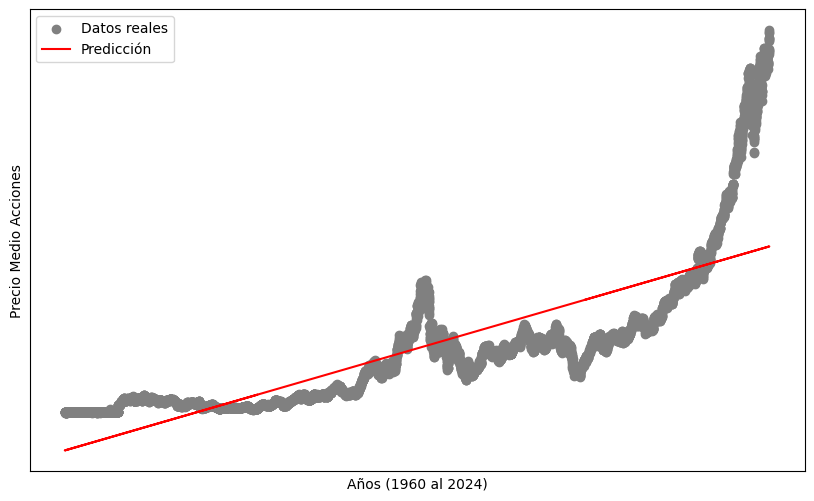

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, color='gray', label='Datos reales')
ax.plot(x, prediccion_precios_gral, color='red', label='Predicción')
ax.set_xlabel('Años (1960 al 2024)')
ax.set_ylabel('Precio Medio Acciones')

ax.set_xticks([])
ax.set_yticks([])
ax.legend()

plt.show()

In [ ]:
print('MAE:',mae(y, prediccion_precios_gral))
print("MSE:", np.sqrt(mean_squared_error(y, prediccion_precios_gral)))
print("R^2:", r2_score(y, prediccion_precios_gral))

MAE: 5.353102006836236
MSE: 7.699218118671095
R^2: 0.6380356881895615


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = SVR(kernel="linear")
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MSE: 159.55111758303588
R^2: 0.06451838297407642


## **CONCLUSIONES DEL MODELO**